In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.model_selection import train_test_split

from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


In [3]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)




In [7]:
quandl.connection.ApiConfig.api_key= "_N85bWLCNCWz14smKHSi"

In [8]:
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2019, 1, 1)
tesla = quandl.get('WIKI/TSLA',start_date=start,end_date=end)

In [9]:
raw_seq=tesla['Adj. Close'].values

In [24]:
# choose a number of time steps
n_steps = 8
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1


In [25]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [26]:
X_train.shape

(1552, 8)

In [27]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 4
X = X_train.reshape((X_train.shape[0], n_seq, n_steps, n_features))

In [12]:
#X = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [28]:
X_train[-1], y_train[-1]

(array([ 220.96,  219.99,  215.2 ,  211.34,  212.01,  200.77,  197.78,
         202.83]), 201.71000000000001)

In [29]:
X.shape, y_train.shape

((1552, 2, 4, 1), (1552,))

In [31]:
X[-1], y_train[-1]

(array([[[ 220.96],
         [ 219.99],
         [ 215.2 ],
         [ 211.34]],
 
        [[ 212.01],
         [ 200.77],
         [ 197.78],
         [ 202.83]]]), 201.71000000000001)

In [32]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

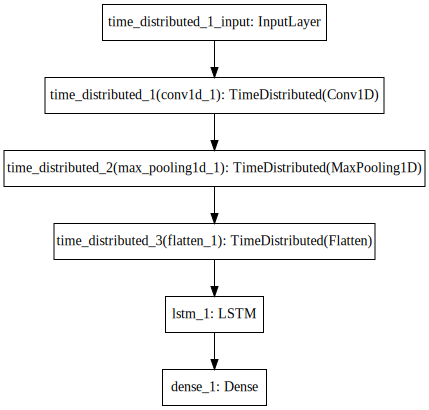

In [33]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [34]:
history=model.fit(X, y_train, epochs=500, verbose=2, validation_split=0.15, shuffle=False)

Train on 1319 samples, validate on 233 samples
Epoch 1/500
 - 1s - loss: 1439.6610 - val_loss: 556.9806
Epoch 2/500
 - 0s - loss: 59.1998 - val_loss: 122.7412
Epoch 3/500
 - 0s - loss: 51.8425 - val_loss: 123.9375
Epoch 4/500
 - 0s - loss: 54.5338 - val_loss: 121.1646
Epoch 5/500
 - 0s - loss: 56.2385 - val_loss: 120.0196
Epoch 6/500
 - 0s - loss: 51.6003 - val_loss: 119.7804
Epoch 7/500
 - 0s - loss: 52.2604 - val_loss: 119.0043
Epoch 8/500
 - 0s - loss: 54.2562 - val_loss: 118.7067
Epoch 9/500
 - 0s - loss: 55.1341 - val_loss: 118.4526
Epoch 10/500
 - 0s - loss: 55.8180 - val_loss: 118.2327
Epoch 11/500
 - 0s - loss: 56.0515 - val_loss: 117.8826
Epoch 12/500
 - 0s - loss: 54.8648 - val_loss: 117.1312
Epoch 13/500
 - 0s - loss: 52.4561 - val_loss: 116.4133
Epoch 14/500
 - 0s - loss: 53.0353 - val_loss: 115.7842
Epoch 15/500
 - 0s - loss: 53.1232 - val_loss: 115.3704
Epoch 16/500
 - 0s - loss: 52.8768 - val_loss: 114.9731
Epoch 17/500
 - 0s - loss: 52.5698 - val_loss: 114.6053
Epoch 18

Epoch 148/500
 - 0s - loss: 29.2126 - val_loss: 56.4031
Epoch 149/500
 - 0s - loss: 29.2024 - val_loss: 56.3504
Epoch 150/500
 - 0s - loss: 29.1982 - val_loss: 56.3086
Epoch 151/500
 - 0s - loss: 29.1782 - val_loss: 56.2128
Epoch 152/500
 - 0s - loss: 29.2023 - val_loss: 56.2385
Epoch 153/500
 - 0s - loss: 29.1972 - val_loss: 56.2055
Epoch 154/500
 - 0s - loss: 29.1841 - val_loss: 56.1627
Epoch 155/500
 - 0s - loss: 29.1548 - val_loss: 56.0636
Epoch 156/500
 - 0s - loss: 29.1712 - val_loss: 56.0829
Epoch 157/500
 - 0s - loss: 29.1628 - val_loss: 56.0514
Epoch 158/500
 - 0s - loss: 29.1325 - val_loss: 55.9588
Epoch 159/500
 - 0s - loss: 29.1436 - val_loss: 55.9755
Epoch 160/500
 - 0s - loss: 29.1219 - val_loss: 55.9007
Epoch 161/500
 - 0s - loss: 29.1239 - val_loss: 55.8994
Epoch 162/500
 - 0s - loss: 29.1045 - val_loss: 55.8303
Epoch 163/500
 - 0s - loss: 29.1117 - val_loss: 55.8466
Epoch 164/500
 - 0s - loss: 29.0979 - val_loss: 55.8178
Epoch 165/500
 - 0s - loss: 29.0612 - val_loss: 

Epoch 295/500
 - 0s - loss: 27.4722 - val_loss: 53.1102
Epoch 296/500
 - 0s - loss: 27.4617 - val_loss: 53.0938
Epoch 297/500
 - 0s - loss: 27.4563 - val_loss: 53.0862
Epoch 298/500
 - 0s - loss: 27.4567 - val_loss: 53.1047
Epoch 299/500
 - 0s - loss: 27.4337 - val_loss: 53.0598
Epoch 300/500
 - 0s - loss: 27.4234 - val_loss: 53.0437
Epoch 301/500
 - 0s - loss: 27.4247 - val_loss: 53.0635
Epoch 302/500
 - 0s - loss: 27.4026 - val_loss: 53.0198
Epoch 303/500
 - 0s - loss: 27.3927 - val_loss: 53.0045
Epoch 304/500
 - 0s - loss: 27.3944 - val_loss: 53.0243
Epoch 305/500
 - 0s - loss: 27.3727 - val_loss: 52.9810
Epoch 306/500
 - 0s - loss: 27.3614 - val_loss: 52.9656
Epoch 307/500
 - 0s - loss: 27.3502 - val_loss: 52.9559
Epoch 308/500
 - 0s - loss: 27.3350 - val_loss: 52.9376
Epoch 309/500
 - 0s - loss: 27.3221 - val_loss: 52.9226
Epoch 310/500
 - 0s - loss: 27.3097 - val_loss: 52.9078
Epoch 311/500
 - 0s - loss: 27.3051 - val_loss: 52.9235
Epoch 312/500
 - 0s - loss: 27.2806 - val_loss: 

Epoch 442/500
 - 0s - loss: 26.2890 - val_loss: 51.6600
Epoch 443/500
 - 0s - loss: 26.3734 - val_loss: 51.9390
Epoch 444/500
 - 0s - loss: 26.1918 - val_loss: 51.2504
Epoch 445/500
 - 0s - loss: 26.5164 - val_loss: 51.8005
Epoch 446/500
 - 0s - loss: 26.4761 - val_loss: 51.8518
Epoch 447/500
 - 0s - loss: 26.3247 - val_loss: 51.4103
Epoch 448/500
 - 0s - loss: 26.4412 - val_loss: 50.9496
Epoch 449/500
 - 0s - loss: 27.1662 - val_loss: 52.4752
Epoch 450/500
 - 0s - loss: 26.7799 - val_loss: 52.0935
Epoch 451/500
 - 0s - loss: 26.4601 - val_loss: 51.5750
Epoch 452/500
 - 0s - loss: 26.3691 - val_loss: 51.4515
Epoch 453/500
 - 0s - loss: 26.3822 - val_loss: 51.5525
Epoch 454/500
 - 0s - loss: 26.2598 - val_loss: 51.7047
Epoch 455/500
 - 0s - loss: 26.0738 - val_loss: 50.7953
Epoch 456/500
 - 0s - loss: 26.4557 - val_loss: 51.9231
Epoch 457/500
 - 0s - loss: 26.3029 - val_loss: 51.5990
Epoch 458/500
 - 0s - loss: 26.0426 - val_loss: 50.7041
Epoch 459/500
 - 0s - loss: 26.7647 - val_loss: 

In [36]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'CNN_LSTM_uni_tesla' + mytime 

In [37]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 200)

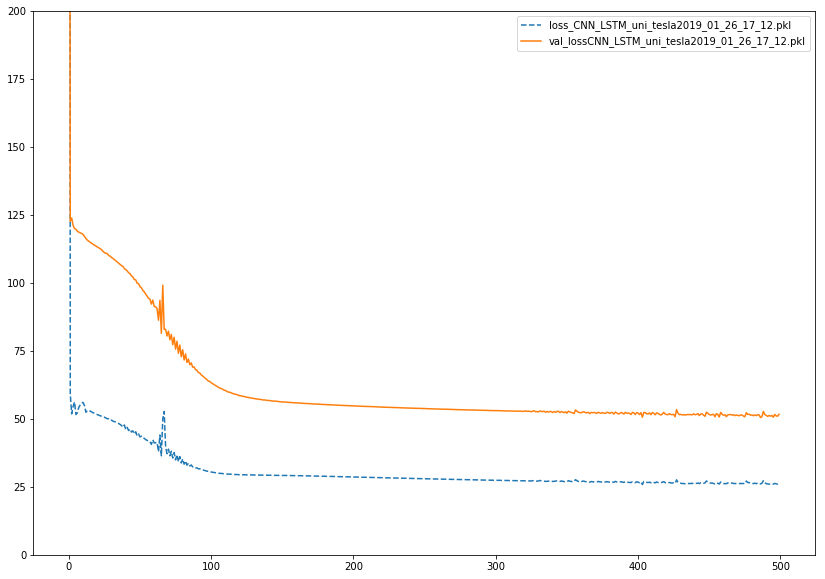

In [38]:
histories = ['CNN_LSTM_uni_tesla2019_01_26_17_12.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 200)

In [39]:
X_t = X_test.reshape((X_test.shape[0], n_seq, n_steps, n_features))

In [40]:
yhat = model.predict(X_t, verbose=2)

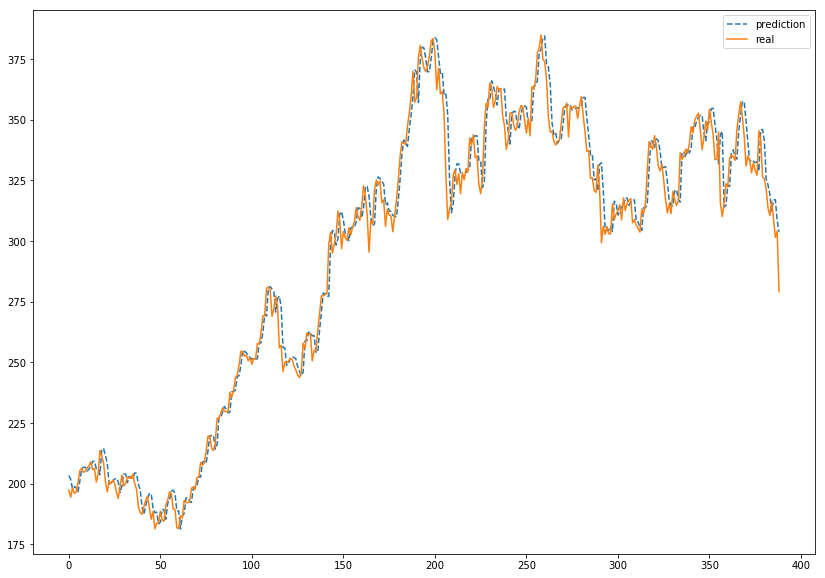

In [47]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(yhat,label ='prediction' ,linestyle='--')
plt.plot(y_test,label='real' )
plt.legend()

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
r2_score(y_test, yhat) 

0.98033469969371745

In [46]:
mean_squared_error(y_test, yhat) 

68.863359368197237